# CPyS : A package for efficient computation of the Cyclone Phase Space parameters
Author: Stella Bourdin, stella.bourdin@physics.ox.ac.uk . Please reach out for any question!

## Installation

In [ ]:
# Download the package very simply with pip
pip install CPyS

## Preliminaries
1. You need a csv file which contains your track(s) (`tracks.csv` hereafter, but you can name it as you wish). This csv can be the output of TempestExtremes' StitchNodes, or it can be obtained from TRACK's output with a code similar to the one at the bottom at this page. It needs to contains at least the longitude and the latitude of the points, named `lon` and `lat`. If several tracks are in the file, it is advised to have a `track_id` variable to distinguish among the tracks. Otherwise, the value of $\theta$ and $B$ for the last point of each track will be wrong. If your csv file has any other additional columns, they will be kept through the process, although not used.
2. You need a NetCDF file with the geopotential at several levels from 900 to 300hPa (at least five are recommended) covering the region where your tracks are (`geopt.nc` hereafter, but you can name it as you wish).
3. Use TempestExtremes' NodeFileCompose to obtain snapshots of the geopotential field along the track(s). Use a code similar to that below, adapted to your data:

```
NodeFileCompose \
    --in_nodefile "tracks.csv" \
    --in_nodefile_type SN \
    --in_fmt "(auto)" \
    --in_data "geopt.nc" \
    --out_grid "RAD" \     # Use radial grid for circular snapshots along the tracks
    --dx 0.5 --resx 10  \  # Snapshots dimension along the radial axis : 10 steps every 0.5° = 500km
    --out_data "snaps.nc" \
    --var "z(:)" \      # Change z to the name of the geopt variable in your data.
    --varout "zg" \     # Your snapshots will be named "snap_zg"
    --snapshots \       # Make sure to output individual snapshots
    --latname latitude --lonname longitude \  # Change to the names in your geopt.nc file
    --regional          # Use this option if your geopt.nc file is not global
```

**NB : NodeFileCompose does not output the value of the vertical coordinate. Be careful to change it before using the snapshots with CPyS**

*This example is based on the track of Typhoon Dale. `Dale.csv` contains the track data, and `Dale.nc` contains the snapshots.*

## Loading the data

In [1]:
# Load the csv data using pandas, or your favorite function.
#import pandas as pd
import huracanpy
track = huracanpy.load("Dale.csv")
track[["track_id", "time", "lon", "lat"]] # Extract of the track file

<xarray.Dataset> Size: 1kB
Dimensions:   (record: 35)
Dimensions without coordinates: record
Data variables:
    track_id  (record) int64 280B 1277 1277 1277 1277 ... 1277 1277 1277 1277
    time      (record) datetime64[ns] 280B 1996-11-05 ... 1996-11-13T12:00:00
    lon       (record) float64 280B 150.5 152.0 152.2 ... 142.8 148.0 155.0
    lat       (record) float64 280B 9.0 10.25 11.25 12.0 ... 28.5 30.5 32.5 36.5

In [2]:
# Load the snapshots file with xarray
import xarray as xr
snaps = xr.open_dataset("Dale.nc")
#snaps["level"] = [...] # !! Change the vertical variable here if necessary. It must be in Pa.

In [3]:
# Snapshots dimensions
snaps.snap_zg.dims

('snapshot', 'level', 'r', 'az')

In [4]:
# Dimensions
snaps.coords

Coordinates:
  * az       (az) float64 128B 0.0 22.5 45.0 67.5 ... 270.0 292.5 315.0 337.5
  * level    (level) int32 84B 25000 30000 35000 40000 ... 95000 97500 100000
  * r        (r) float64 400B 0.1 0.3 0.5 0.7 0.9 1.1 ... 9.1 9.3 9.5 9.7 9.9

## Computation of the CPS parameters

In [5]:
from CPyS import compute_CPS_parameters

In [6]:
track_w_CPS_params = compute_CPS_parameters(track, snaps)
track_w_CPS_params[["track_id", "time", "lon", "lat", "theta", "B", "VTL", "VTU"]] # Results!

Computing B...
Level 90000 is taken for 900hPa
Level 60000 is taken for 600hPa

Computing VTL & VTU...


,track_id,time,lon,lat,theta,B,VTL,VTU
record,,,,,,,,
0,1277,1996-11-05 00:00:00,150.50,9.00,40.144447,-4.414739,48.728841,36.933898
1,1277,1996-11-05 06:00:00,152.00,10.25,76.137420,-6.975934,74.375981,47.726629
2,1277,1996-11-05 12:00:00,152.25,11.25,134.515941,-10.921301,81.880806,54.397699
3,1277,1996-11-05 18:00:00,151.50,12.00,217.161769,2.005280,120.169291,116.594427
4,1277,1996-11-06 00:00:00,150.50,11.25,270.000000,12.463517,119.258912,107.699136
5,1277,1996-11-06 06:00:00,150.50,11.00,123.288159,-10.019094,122.372489,105.959700
6,1277,1996-11-06 12:00:00,150.00,11.75,191.341926,-0.995960,142.778913,106.332585
7,1277,1996-11-06 18:00:00,148.75,11.50,270.000000,3.705381,128.205585,116.285513
8,1277,1996-11-07 00:00:00,148.75,11.00,165.698153,2.488612,151.808066,132.191755


## Plot of the phase space diagram
I have included a simple function to plot the two traditionnal phase space diagrams.

In [7]:
from CPyS import plot_CPS

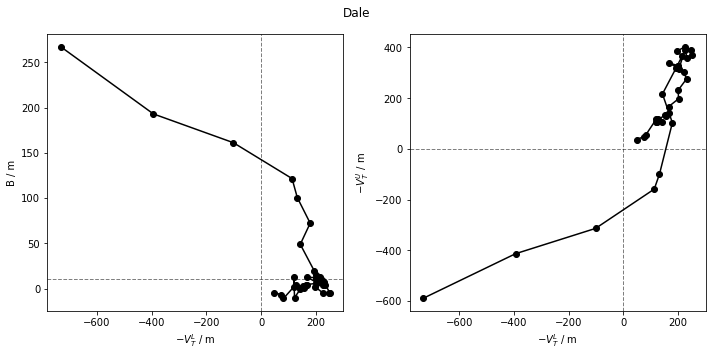

In [8]:
plot_CPS(track_w_CPS_params, title = "Dale")